# Basic Libraries

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

# provider = IBMQ.get_provider(hub='ibm-q')
# machine = provider.get_backend('ibmq_valencia')
from qiskit.test.mock import FakeLondon
machine = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\Eesh Gupta\anacondaaa\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Inversion Functions

In [42]:
def split(word): 
    return [char for char in word] 
import math 

def PiReader(string):
    '''
    Converts symbol experession to numerical answer
    
    Assumption: should not contain decimal
    '''
    
    #null case 
    if string == "0" or string == "0.0": 
        return 0
    
    temp = []
    expression = 1
    
    arry = split(string)
    i = 0
    
    while (i<len(arry)): 
        element = arry[i]

        #number
        if element.isdigit():
            
            number = int(element)
            i+=1
#             #to make sure 2,3,.. digit case is accounted for
#             while(arry[i].isdigit()):
#                 number = number*10 +int(arry[i])
#                 i+=1
#             #finally multiplying by the number
            expression*=number
            
        #negative sign 
        elif element == '-':
            expression *= -1
            i+=1
            
        #pi 
        elif element == 'p':
            expression *= float(math.pi)
            i+=2   #skip the 'i'
            
        #division sign
        elif element == "/": 
            expression/= int(arry[i+1])
            i+=2
            
        else:
            print('Erront in parsing angle.... char is ' + element)
            expression*=1
            i+=1

    return expression

In [56]:
import math 

def u3Inverter(orig_gate_str, barrier): 
    """
    Input: a qasm string corresponding to a gate
    Output: invert u3
    """
    # Converting the gate string to array 
    
    ##break up the string 
    strings = orig_gate_str.split("(")
    temp =[]
    for string in strings: 
        temp = temp + string.split(")")
    strings = temp 
    temp =[]
    for string in strings: 
        temp = temp + string.split(",")
    strings = temp 
    temp = []
    for string in strings: 
        temp = temp + string.split("*")
    strings = temp
    
    #Obtaining all useful information 
    gate = strings[0]
    qubit = strings[4]
    orig_angles = strings[1:4]
    
    #new angles 
    new_angles = orig_angles 
    
    ## U3 inverted (assymetry) = U3( theta ,- lambda, - phi)
    
    for i in range(0,3): 
        
        if 'pi' in new_angles[i]: 
            angle = PiReader(new_angles[i])
        else: 
            angle = float(new_angles[i])
            
            
        new_angles[i] = str(- angle)
        
            

    #creating inverted gate
    new_gate_str = gate + '(' + new_angles[0] + ',' + new_angles[1] + ',' + new_angles[2] + ')' + qubit
    
    #barrier 
    #barrier ="""barrier q[0],q[1];"""
    
    return barrier + '\n' + new_gate_str + '\n'+ barrier + '\n' 
    

In [60]:
def u1Inverter(orig_gate_str, barrier): 
    """
    Input: a qasm string corresponding to a gate
    Output: invert u1
    """
    # Converting the gate string to array 
    
    ##break up the string 
    strings = orig_gate_str.split("(")
    temp =[]
    for string in strings: 
        temp = temp + string.split(")")
    strings = temp 
    temp =[]
    for string in strings: 
        temp = temp + string.split(",")
    strings = temp 
    temp = []
    for string in strings: 
        temp = temp + string.split("*")
    strings = temp
    
    #Obtaining all useful information 
    gate = strings[0]
    qubit = strings[2]
    orig_angles = strings[1:2]
    
    #new angles 
    new_angles = orig_angles 
    
    ## U3 inverted (assymetry) = U3( theta ,- lambda, - phi)
    
    for i in range(1): 
        
        if 'pi' in new_angles[i]: 
            angle = PiReader(new_angles[i])
        else: 
            angle = float(new_angles[i])
            
            
        new_angles[i] = str(- angle)
        
            

    #creating inverted gate
    new_gate_str = gate + '(' + new_angles[0] + ')' + qubit
    
    #barrier 
    #barrier ="""barrier q[0],q[1];"""
    
    return barrier + '\n' + new_gate_str + '\n'+ barrier + '\n' 

In [61]:
def u2Inverter(orig_gate_str, barrier): 
    """
    Input: a qasm string corresponding to a gate
    Output: invert u2
    """
    # Converting the gate string to array 
    
    ##break up the string 
    strings = orig_gate_str.split("(")
    temp =[]
    for string in strings: 
        temp = temp + string.split(")")
    strings = temp 
    temp =[]
    for string in strings: 
        temp = temp + string.split(",")
    strings = temp 
    temp = []
    for string in strings: 
        temp = temp + string.split("*")
    strings = temp
    
    #Obtaining all useful information 
    gate = strings[0]
    qubit = strings[3]
    orig_angles = strings[1:3]
    
    #new angles 
    new_angles = orig_angles 
    
    ## U3 inverted (assymetry) = U3( theta ,- lambda, - phi)
    
    for i in range(0,2): 
        
        if 'pi' in new_angles[i]: 
            angle = PiReader(new_angles[i])
        else: 
            angle = float(new_angles[i])
            
            
        new_angles[i] = str(- angle)
        
            

    #creating inverted gate
    new_gate_str = gate + '(' + new_angles[0] + ',' + new_angles[1]+ ')' + qubit
    
    #barrier 
    #barrier ="""barrier q[0],q[1];"""
    
    return barrier + '\n' + new_gate_str + '\n'+ barrier + '\n' 

In [62]:
def cXInverter(orig_gate_str, barrier): 
    """
    Input: a qasm string corresponding to a gate
    Output: a pair of gates in qasm string representation to amplify error in the given gate by factor of 3
    """
    #barrier for 2 qubit circuit only
    #barrier ="""barrier q[0],q[1];"""
    x_gate_0 = """x q[0];"""
    x_gate_1 = """x q[1];"""
    x_gates =  x_gate_0 + '\n'+x_gate_1
    
    return barrier + '\n' + x_gates+ '\n' + barrier + '\n' + orig_gate_str +'\n' +barrier + '\n'+x_gates + '\n' + barrier + '\n'

In [63]:
import random 
debug = []

def GateInverter(circ): 
    """
    Input: a circuit (with u3 and cnot gates only)
    Output: Inverting the circuit
    """
    #for creating barriers!
    n_qubits = circ.num_qubits
    qubit_str = ""
    if (n_qubits == 1): qubit_str= "q[0]"
    elif (n_qubits == 2): qubit_str= "q[0],q[1]"
    
    barrier = "barrier " + qubit_str + ";"
    
    x_gate_0 = """x q[0];"""
    x_gate_1 = """x q[1];"""
    x_gates =  x_gate_0 + '\n'+x_gate_1
    #iterating over the circuit in string representation
    
    
    newqasm_str=""
    circ_str=circ.qasm()
    print("Converting circ to string using Qasmstring function in Quantum Ciruit")
    print(circ_str)
    
    qregname=circ.qregs[0].name
    global debug 
    debug = []
    
    for line in iter(circ_str.splitlines()):
        if line.startswith('cx'):
            newqasm_str += cXInverter(line, barrier)
        elif line.startswith('u3'):
            newqasm_str += u3Inverter(line, barrier)
        elif line.startswith('u2'):
            newqasm_str += u2Inverter(line, barrier)
        elif line.startswith('u1'):
            newqasm_str += u1Inverter(line, barrier)
        elif line.startswith('qreg'):
            newqasm_str+=line+"\n"
            newqasm_str+=x_gates+"\n"
        else:
            newqasm_str+=line+"\n"
    print("------------------------------------")
    print("passing a modified qasm string to from_qasm_str method of quantum circuit")
    newqasm_str+=x_gates+"\n"
    print(newqasm_str)

    circo=QuantumCircuit().from_qasm_str(newqasm_str)
    
    return circo 


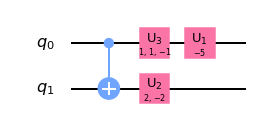

In [64]:
circ = QuantumCircuit(2)
circ.cx(0,1)
circ.u3(1,1,-1,0)
circ.u2(2,-2,1)
circ.u1(-5, 0)
circ.draw(output = 'mpl')

Converting circ to string using Qasmstring function in Quantum Ciruit
OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
cx q[0],q[1];
u3(1,1,-1) q[0];
u2(2,-2) q[1];
u1(-5) q[0];

------------------------------------
passing a modified qasm string to from_qasm_str method of quantum circuit
OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
x q[0];
x q[1];
barrier q[0],q[1];
x q[0];
x q[1];
barrier q[0],q[1];
cx q[0],q[1];
barrier q[0],q[1];
x q[0];
x q[1];
barrier q[0],q[1];
barrier q[0],q[1];
u3(-1.0,-1.0,1.0) q[0];
barrier q[0],q[1];
barrier q[0],q[1];
u2(-2.0,2.0) q[1];
barrier q[0],q[1];
barrier q[0],q[1];
u1(5.0) q[0];
barrier q[0],q[1];
x q[0];
x q[1];



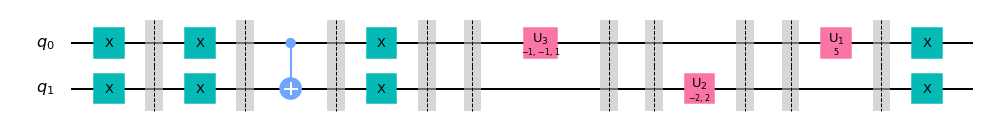

In [65]:
(GateInverter(circ)).draw(output = 'mpl')

#  Inverting VQE Circuit

In [100]:
param = " 0.00180277, -0.00184986, -0.11215176"

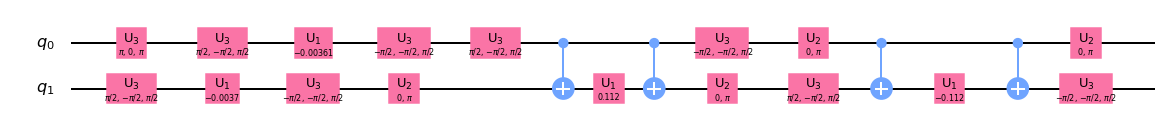

In [101]:
string = """OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\nu3(pi,0,pi) q[0];\nu3(pi/2,-pi/2,pi/2) q[0];\nu1(-0.0036055449) q[0];\nu3(-pi/2,-pi/2,pi/2) q[0];\nu3(pi/2,-pi/2,pi/2) q[0];\nu3(pi/2,-pi/2,pi/2) q[1];\nu1(-0.003699724) q[1];\nu3(-pi/2,-pi/2,pi/2) q[1];\nu2(0,pi) q[1];\ncx q[0],q[1];\nu1(0.11215176) q[1];\ncx q[0],q[1];\nu3(-pi/2,-pi/2,pi/2) q[0];\nu2(0,pi) q[0];\nu2(0,pi) q[1];\nu3(pi/2,-pi/2,pi/2) q[1];\ncx q[0],q[1];\nu1(-0.11215176) q[1];\ncx q[0],q[1];\nu2(0,pi) q[0];\nu3(-pi/2,-pi/2,pi/2) q[1];\n"""
vqe_circ = QuantumCircuit.from_qasm_str(string)
from qiskit.compiler import transpile
#basis_gates =  ['id', 'u3']
#vqe_circ = transpile(vqe_circ, basis_gates = basis_gates)
vqe_circ.draw(output = 'mpl')

Converting circ to string using Qasmstring function in Quantum Ciruit
OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
u3(pi,0,pi) q[0];
u3(pi/2,-pi/2,pi/2) q[0];
u1(-0.0036055449) q[0];
u3(-pi/2,-pi/2,pi/2) q[0];
u3(pi/2,-pi/2,pi/2) q[0];
u3(pi/2,-pi/2,pi/2) q[1];
u1(-0.003699724) q[1];
u3(-pi/2,-pi/2,pi/2) q[1];
u2(0,pi) q[1];
cx q[0],q[1];
u1(0.11215176) q[1];
cx q[0],q[1];
u3(-pi/2,-pi/2,pi/2) q[0];
u2(0,pi) q[0];
u2(0,pi) q[1];
u3(pi/2,-pi/2,pi/2) q[1];
cx q[0],q[1];
u1(-0.11215176) q[1];
cx q[0],q[1];
u2(0,pi) q[0];
u3(-pi/2,-pi/2,pi/2) q[1];

------------------------------------
passing a modified qasm string to from_qasm_str method of quantum circuit
OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
x q[0];
x q[1];
barrier q[0],q[1];
u3(-3.141592653589793,-0.0,-3.141592653589793) q[0];
barrier q[0],q[1];
barrier q[0],q[1];
u3(-1.5707963267948966,1.5707963267948966,-1.5707963267948966) q[0];
barrier q[0],q[1];
barrier q[0],q[1];
u1(0.0036055449) q[0];
barrier q[0],q[1];
barrier q[0],

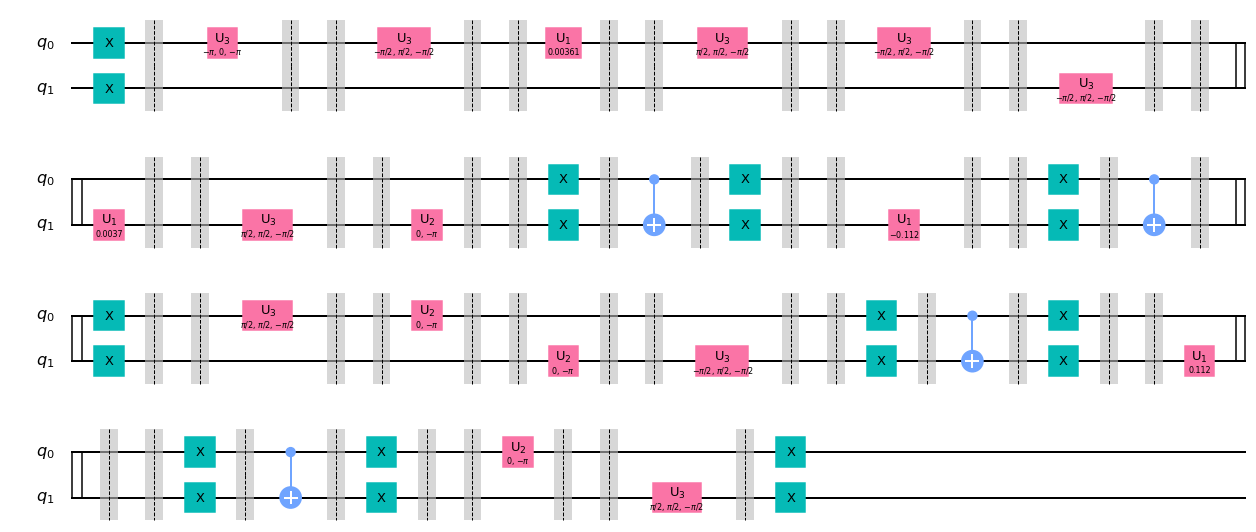

In [102]:
vqe_invert_circ = GateInverter(vqe_circ)
vqe_invert_circ.draw(output = 'mpl')

### Hammyfication

In [103]:
from qiskit import ClassicalRegister
import math

Hamiltonian = """II
IZ 
ZI
ZZ
XX"""

Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]

def Hammifier(circy):
    """
    Adding local hamiltonians and returning one for meas II, IZ . ZI. ZZ and other for XX
    """
    circuits = []
    for line in iter(Hamiltonian.splitlines()):
        circ = circy.copy()
        for index in range(len(line)):
            op = line[index]

            ##do nothing if Z or I
            if(op == "X"): 
                #hadamard in u3
                circ.u3(math.pi/2, 0, math.pi, index)
            elif(op == "Y"):
                circ.rx(pi/2, index)
        c = ClassicalRegister(2)
        circ.add_register(c)
        circ.measure([0], [0])
        circ.measure([1],[1])
        circuits.append(circ)
    return [circuits[0], circuits[4]]

In [104]:
less_circuits = Hammifier(vqe_circ)
inverted_less_circuits = Hammifier(vqe_invert_circ)

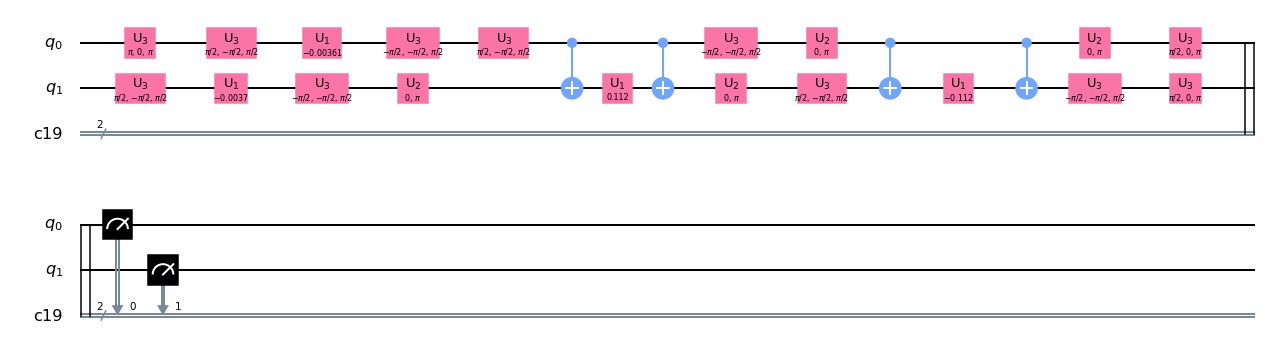

In [105]:
less_circuits[1].draw(output = 'mpl')

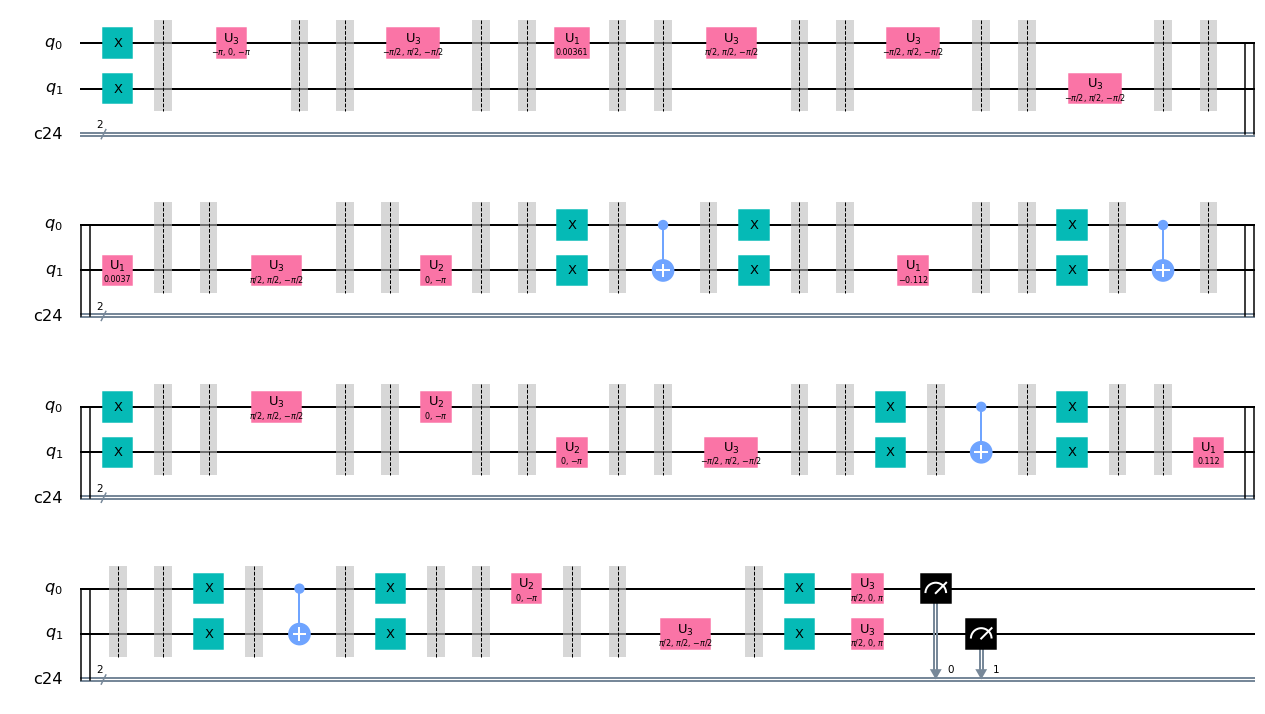

In [106]:
inverted_less_circuits[1].draw(output = 'mpl')

# Running Circuits

### Expectation Value Func

In [107]:
def binaryToDecimal(binary):  
    binary1 = binary 
    decimal, i, n = 0, 0, 0
    while(binary != 0): 
        dec = binary % 10
        decimal = decimal + dec * pow(2, i) 
        binary = binary//10
        i += 1
    return decimal

In [108]:
def dictToList(dicty): 
    '''
    Converts dictionary to a list of keys appearing [frequency] number of times
    '''
    keys = dicty.keys()
    listy = []
    
    for key in keys: 
        listy += [key for i in range(dicty[key])]
    
    return listy

In [109]:
def sampleExpecVal(samp_zsis, samp_xx):
    '''
    Input: count corresponding to zz, zi, etc..., count corresponding to xx
    Output: expectation value of the sample
    '''
    
    #Hamiltonian = """II IZ ZI  ZZ XX"""
    Hamiltonian = ['ii', 'iz', 'zi', 'zz', 'xx' ]
    Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]
    Hamiltonian_eig = []
    
    for hammy in Hamiltonian: 
        if (hammy!= 'xx'): 
            Hamiltonian_eig+= [countToEig(samp_zsis, hammy)]
        else:
            Hamiltonian_eig+= [countToEig(samp_xx, hammy)]
            
    #combining eigvals of local hamiltonians 
    energy = np.dot(Hamiltonian_weights, Hamiltonian_eig)
    
    #add in the shift (nuclear repulsion energy)
    shift = 0.7151043390810812
    
    return energy + shift

In [110]:
import numpy as np
from qiskit.quantum_info import Pauli 

def countToEig(count, matrix): 
    '''
    Input: count (string), matrix (2 bit string)
    Output: eigval corresponding to that count
    '''
    
    #general matrices 
    x = [[0, 1],[1, 0]]
    z = [[1, 0], [0, -1]]
    i = [[1, 0],[0,1]]
    #parsing matrices
    matrices = []
    for mat in matrix: 
        if (mat== 'x'):
            matrices.append(x)
        elif(mat == 'z'):
            matrices.append(z)
        elif(mat == 'i'): 
            matrices.append(i)
        else: 
            print('Error parsing matrices')
    first = matrices[0]
    second = matrices[1]
#     print('Matrices are ')
#     print(first)
#     print(second)
    
    #computing eigenvalue of kron(first, second)
    v, w = np.linalg.eig(np.kron(first, second))
    #convert count to dec
    count = binaryToDecimal(int(count))
    return v[count]
          

In [111]:
import random

def expecValForSamples(counts_zsis, counts_xx):
    '''
    Input: counts [dict] for zz,iz, etc. , counts[dict] for xx
    Output: List of expecVal for all the samples
    '''
    
    #convert dict to list
    list_zsis = dictToList(counts_zsis)
    list_xx = dictToList(counts_xx)
    
    #extract samples from list and compute expec val
    expec_vals = []
    while(len(list_zsis)!= 0 and len(list_xx)!= 0): 
        index1 = random.randrange(0, len(list_zsis))
        index2 = random.randrange(0, len(list_xx))
        
        exp_val= sampleExpecVal(list_zsis[index1], list_xx[index2])
        expec_vals.append(exp_val)
        
        #removing those items from list 
        list_zsis.pop(index1)
        list_xx.pop(index2)
    return expec_vals

In [112]:
def addDicts(listy): 
    '''
    Input: list of dicts of counts 
    Output: combining all dicts into one dict, returning that
    '''
    keys = ['00', '11', '10', '01']
    master = {}
    
    for key in keys: 
        #initializing master at that key
        master[key] = 0
        
        #now adding up all dictys[key]
        for dicty in listy: 
            try:
                master[key] += dicty[key]
            except KeyError: 
                continue
    return master
            

### Running Function

In [113]:
def evaluator(circuits, samples, noise_model):
    """
    Input: circuits, noise model to run on , weights of the local hammys
    Output: expectation value (energy)
    
    """
    
    #Running the circuits 
    results = [[] for i in range(len(circuits))]
  
    
    
    while(samples!=0):
        if (samples>8192):
            for i_circ in range(len(circuits)):
                circ = circuits[i_circ]
                job =  execute(circ, backend = simulator, noise_model = noise_model, shots = 8192)
                counts = job.result().get_counts()
                results[i_circ].append(counts)
            samples-= 8192
        else: 
            for i_circ in range(len(circuits)):
                circ = circuits[i_circ]
                job =  execute(circ, backend = simulator, noise_model = noise_model, shots = samples)
                counts = job.result().get_counts()
                results[i_circ].append(counts)
            samples = 0
    print('Running Circuits done')
    #adding up all the dicts
    counties = [addDicts(circ_results) for circ_results in results]
    
    print('Adding dicts done')
    #computing expectation values
    expec_vals = expecValForSamples(counties[0], counties[1])
    print('Computing expec vals done')
        
    return expec_vals

## Running Now

In [114]:
samples = [100*i for i in range(100)]
results_ideal= []
results_noisy = []
results_ideal_invert= []
results_noisy_invert = []


for sample in samples: 
    print('------------------ Sample ' + str(sample) + ' ---------------------------')
    result_id = evaluator(less_circuits, sample, None)
    result_noi =evaluator(less_circuits, sample, machine_noise_model)
    result_id_invert = evaluator(inverted_less_circuits, sample, None)
    result_noi_invert =evaluator(inverted_less_circuits, sample, machine_noise_model)
    results_ideal.append(result_id)
    results_noisy.append(result_noi)
    results_ideal_invert.append(result_id_invert)
    results_noisy_invert.append(result_noi_invert)


------------------ Sample 0 ---------------------------
Running Circuits done
Adding dicts done
Computing expec vals done
Running Circuits done
Adding dicts done
Computing expec vals done
Running Circuits done
Adding dicts done
Computing expec vals done
Running Circuits done
Adding dicts done
Computing expec vals done
------------------ Sample 100 ---------------------------
Running Circuits done
Adding dicts done
Computing expec vals done
Running Circuits done
Adding dicts done
Computing expec vals done
Running Circuits done
Adding dicts done
Computing expec vals done
Running Circuits done
Adding dicts done
Computing expec vals done
------------------ Sample 200 ---------------------------
Running Circuits done
Adding dicts done
Computing expec vals done
Running Circuits done
Adding dicts done
Computing expec vals done
Running Circuits done
Adding dicts done
Computing expec vals done
Running Circuits done
Adding dicts done
Computing expec vals done
------------------ Sample 300 ------

In [115]:
def meansAndErrs(results, samples):
    '''
    Return means and errors of computed energies across samples
    '''
    means = []
    errses = []
    for i in range(len(samples)): 
        mean = np.mean(results[i])
        err = np.std(results[i])/np.sqrt(samples[i])
        means.append(mean)
        errses.append(err)
    return means, errses


In [116]:
results = [results_ideal, results_noisy, results_ideal_invert, results_noisy_invert]

meanses = []
errses = []
for result in results:
    means, errs = meansAndErrs(result, samples)
    meanses.append(means)
    errses.append(errs)

In [117]:
Labels = ['Ideal', 'Noisy', 'Ideal Inverted', 'Noisy Inverted']
colors = ['tab:blue','tab:orange', 'tab:green', 'tab:red' ]

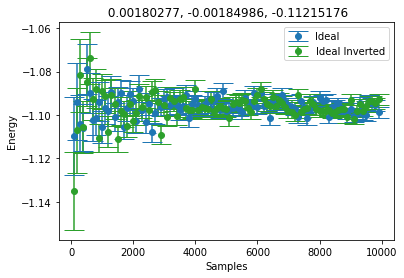

In [121]:
import matplotlib.pyplot as plt
a = plt.figure()
for i in [0, 2]:
    plt.errorbar(samples, meanses[i], yerr=errses[i],capsize = 10, fmt ='o', color = colors[i], label = Labels[i])
plt.xlabel('Samples')
plt.ylabel('Energy')
plt.title(param)
plt.legend()
plt.show()
a.savefig("Sept21(2).png", dpi = 1000)

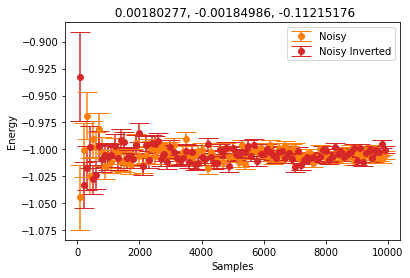

In [122]:
a = plt.figure()
for i in [1, 3]:
    plt.errorbar(samples, meanses[i], yerr=errses[i],capsize = 10, fmt ='o', color = colors[i], label = Labels[i])
plt.xlabel('Samples')
plt.ylabel('Energy')
plt.title(param)
plt.legend()
plt.show()
a.savefig("Sept21(3).png", dpi = 1000)

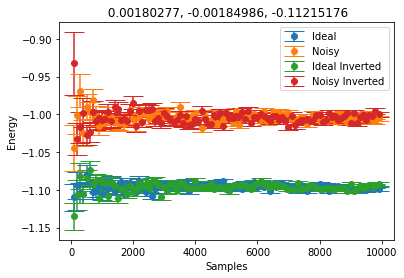

In [123]:
import matplotlib.pyplot as plt
a = plt.figure()
for i in [0, 1, 2, 3]:
    plt.errorbar(samples, meanses[i], yerr=errses[i],capsize = 10, fmt ='o', color = colors[i], label = Labels[i])
plt.xlabel('Samples')
plt.ylabel('Energy')
plt.title(param)
plt.legend()
plt.show()
a.savefig("Sept21(1).png", dpi = 1000)